In [28]:
import pandas as pd
import numpy as np
import datetime
import time
import warnings
warnings.filterwarnings('ignore')

from pymongo import MongoClient
cl = MongoClient()
db = cl['flights']
col_ddr = db['ddr2_flights']
col_adsb = db['adsb_flights']

ep_start = 1508457601
ep_end = 1508716799

In [6]:
col_ddr.create_index("start_ep")
col_adsb.create_index("start_ep")

'start_ep_1'

In [7]:
ddr_cs = col_ddr.distinct("callsign")
adsb_cs = col_adsb.distinct("callsign")
cs_match = list(set(adsb_cs).intersection(set(ddr_cs)))

In [39]:
def calc_dist(r):
    return gd.vincenty(r['coords-1'], r['coords']).m

def add_dst_to_adsb_df(df):
    

92

In [11]:
df_ddr = pd.DataFrame()
df_adsb = pd.DataFrame()

for c in cs_match:
    df_ddr = df_ddr.append(pd.DataFrame(list(col_ddr.find({"callsign":c, "data_type":'m1'}))))
    df_adsb = df_adsb.append(pd.DataFrame(list(col_adsb.find({"callsign":c}))))


In [29]:
df_adsb_2 = df_adsb[['callsign','start_ep']]
df_ddr_2 = df_ddr[['callsign','start_ep']]

df_ddr_2['start_ep_rnd'] = df_ddr_2['start_ep']/1800
df_adsb_2['start_ep_rnd'] = df_adsb_2['start_ep']/1800
df_ddr_2['start_ep_rnd'] = df_ddr_2['start_ep_rnd'].astype(int)
df_adsb_2['start_ep_rnd'] = df_adsb_2['start_ep_rnd'].astype(int)

new_df = pd.merge(df_adsb_2, df_ddr_2,  how='inner', left_on=['callsign','start_ep_rnd'], 
                  right_on = ['callsign','start_ep_rnd'], suffixes=('_adsb','_ddr'))
new_df

,callsign,start_ep_adsb,start_ep_rnd,start_ep_ddr
0,KLM88J,1.508474e+09,838040,1.508473e+09
1,EZY96HP,1.508491e+09,838050,1.508490e+09
2,EZY96HP,1.508575e+09,838097,1.508576e+09
3,KLM1486,1.508477e+09,838042,1.508477e+09
4,KLM1834,1.508521e+09,838066,1.508519e+09
5,BAW430,1.508486e+09,838047,1.508485e+09
6,BAW430,1.508572e+09,838095,1.508572e+09
7,NJE044T,1.508499e+09,838054,1.508497e+09
8,EZY37HQ,1.508592e+09,838106,1.508592e+09
9,KLM38P,1.508489e+09,838049,1.508488e+09


In [30]:
len(new_df)

175

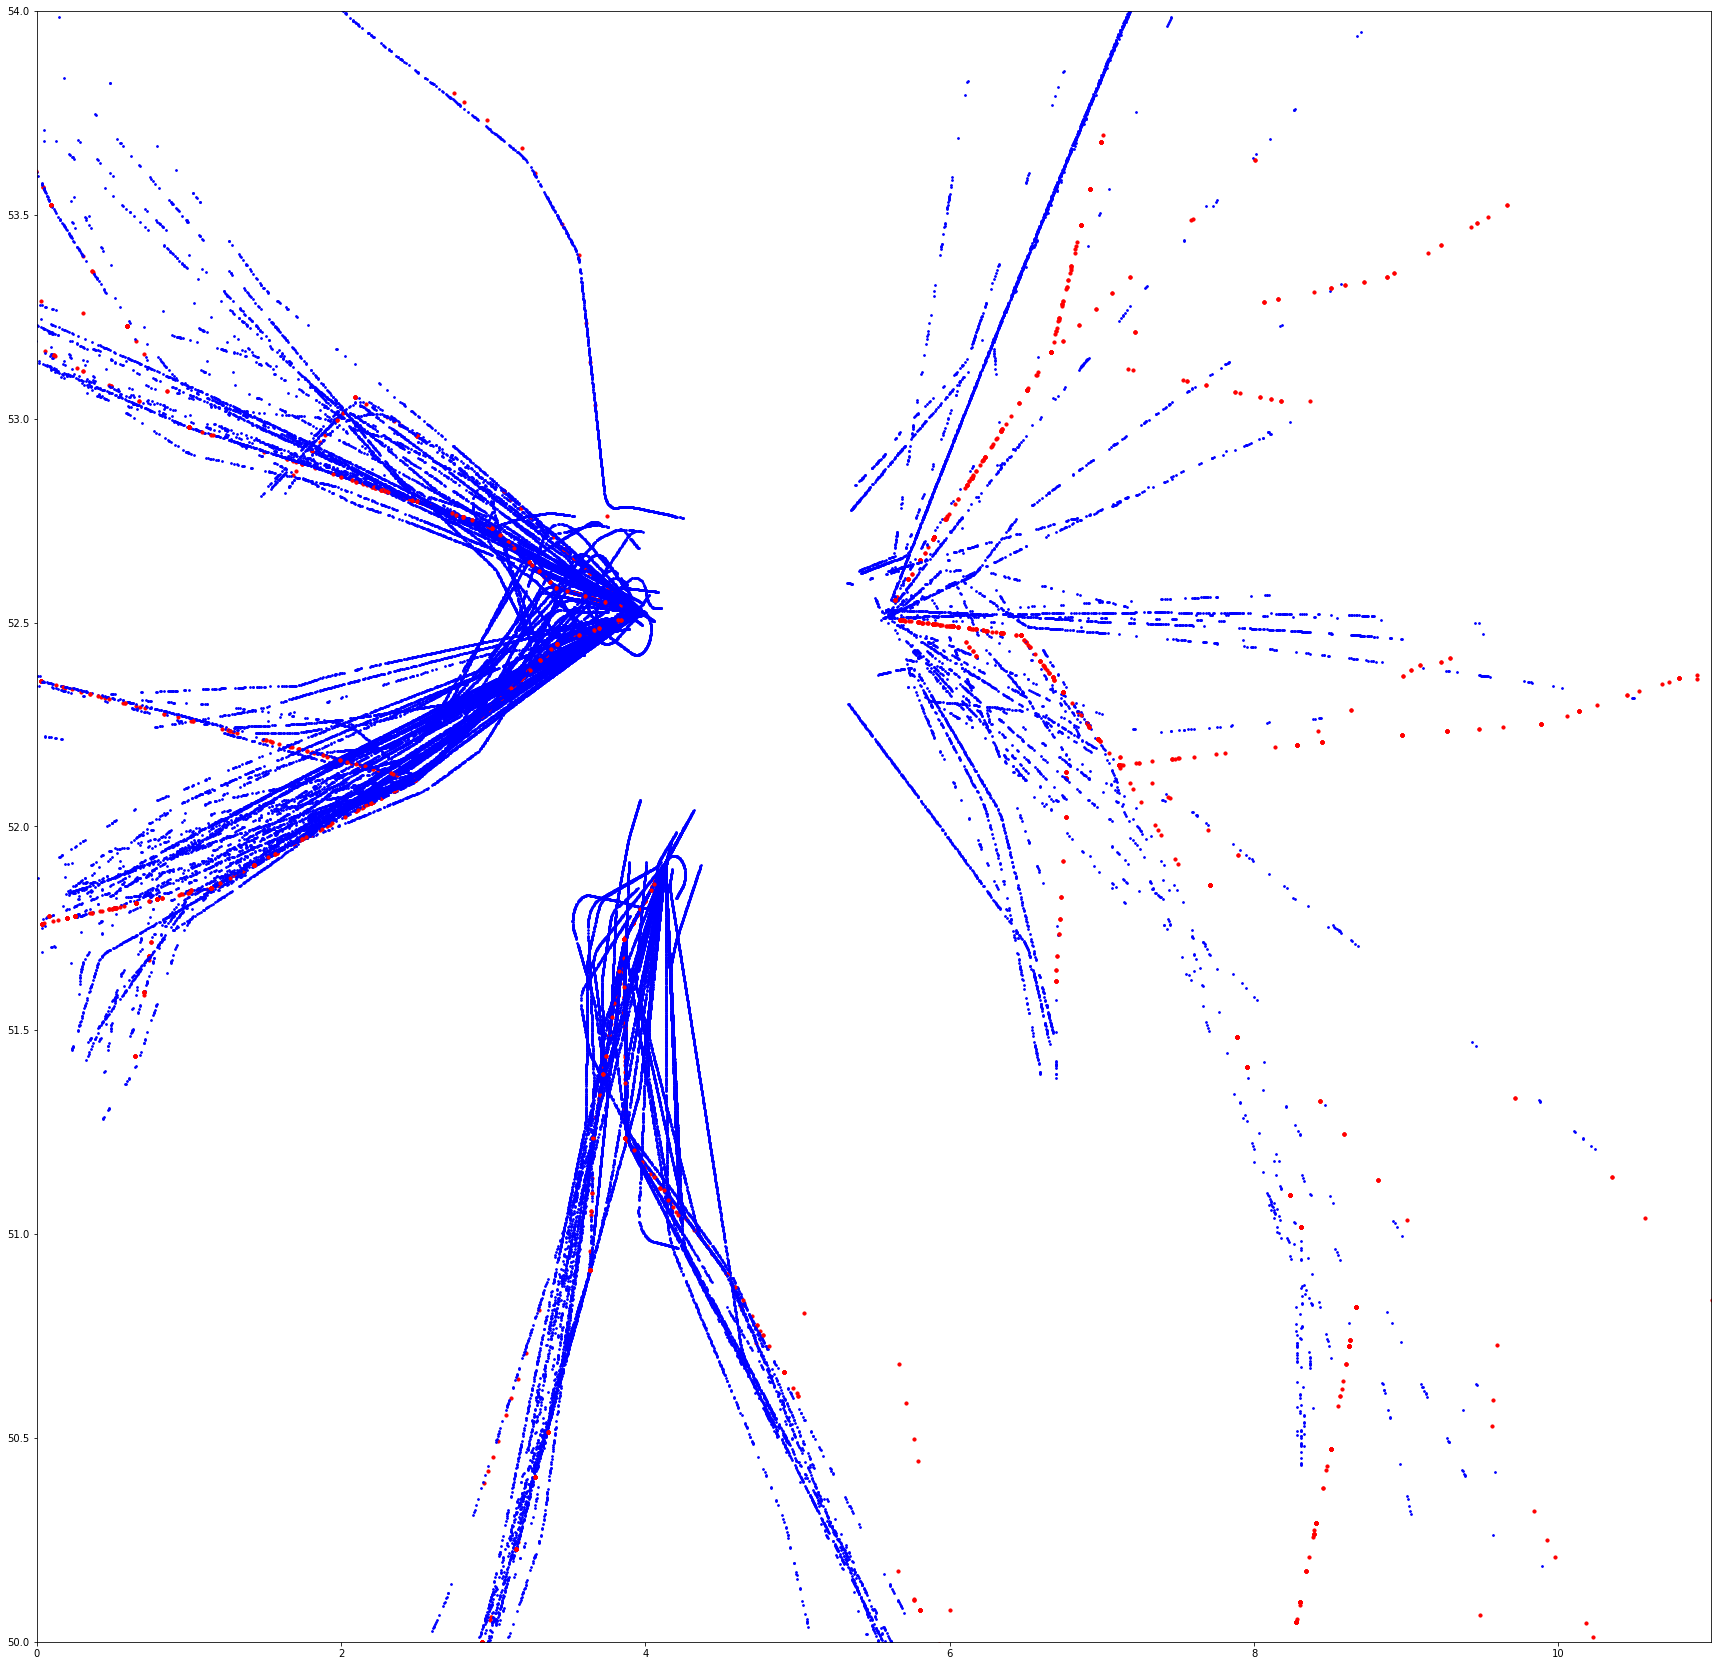

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
lat_bounds = [50, 54]
lon_bounds = [0, 11]
fl_min = 100
i = 8

for n,r in new_df.iterrows():
    c = r['callsign']
    ta = r['start_ep_adsb']
    td = r['start_ep_ddr']
    for dd in col_ddr.find({"$and": [{"callsign":c},{"start_ep":td}]}):
        gd = pd.DataFrame(dd)
        gd = gd[gd['fl_seg_b'] > fl_min]
        plt.scatter(list(gd['lon_seg_b']),list(gd['lat_seg_b']), c="r", s=10)
        plt.xlim(tuple(lon_bounds))
        plt.ylim(tuple(lat_bounds))

    for da in col_adsb.find({"$and": [{"callsign":c},{"start_ep":ta}]}):
        ga = pd.DataFrame(da)
        ga = ga[ga['alt'] > 100*fl_min]
        plt.scatter(list(ga['lon']),list(ga['lat']), c="b", s=3)
        plt.xlim(tuple(lon_bounds))
        plt.ylim(tuple(lat_bounds))
    
plt.show()
# plt.figure(figsize=(30,10))
# for d in col_ddr.find({"callsign":cs_match[5]}):
#     g = pd.DataFrame(d)
# #     g['dst'] = g['seg_len'].cumsum()
#     plt.plot(list(g['dst']),list(g['hdg'].diff()), c="b")
#     plt.ylim((-2,2))
# plt.show()


In [30]:
plt.show()

In [16]:
for n,r in new_df[:100].iterrows():
    c = r['callsign']
    ta = r['start_ep_adsb']
#     td = r['start_ep_ddr']
    for d in col_ddr.find({"callsign":c}):
        g = pd.DataFrame(d)
        g = g[g['fl_seg_b'] > fl_min]
        plt.plot(list(g['lon_seg_b']),list(g['lat_seg_b']), c="r")
        plt.xlim(tuple(lon_bounds))
        plt.ylim(tuple(lat_bounds))

    for d in col_adsb.find({"callsign":c}):
        g = pd.DataFrame(d)
        g = g[g['alt'] > 100*fl_min]
        plt.scatter(list(g['lon']),list(g['lat']), c="b", s=3)
        plt.xlim(tuple(lon_bounds))
        plt.ylim(tuple(lat_bounds))

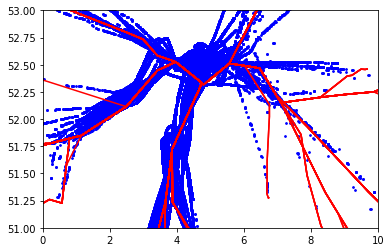

In [17]:
plt.show()

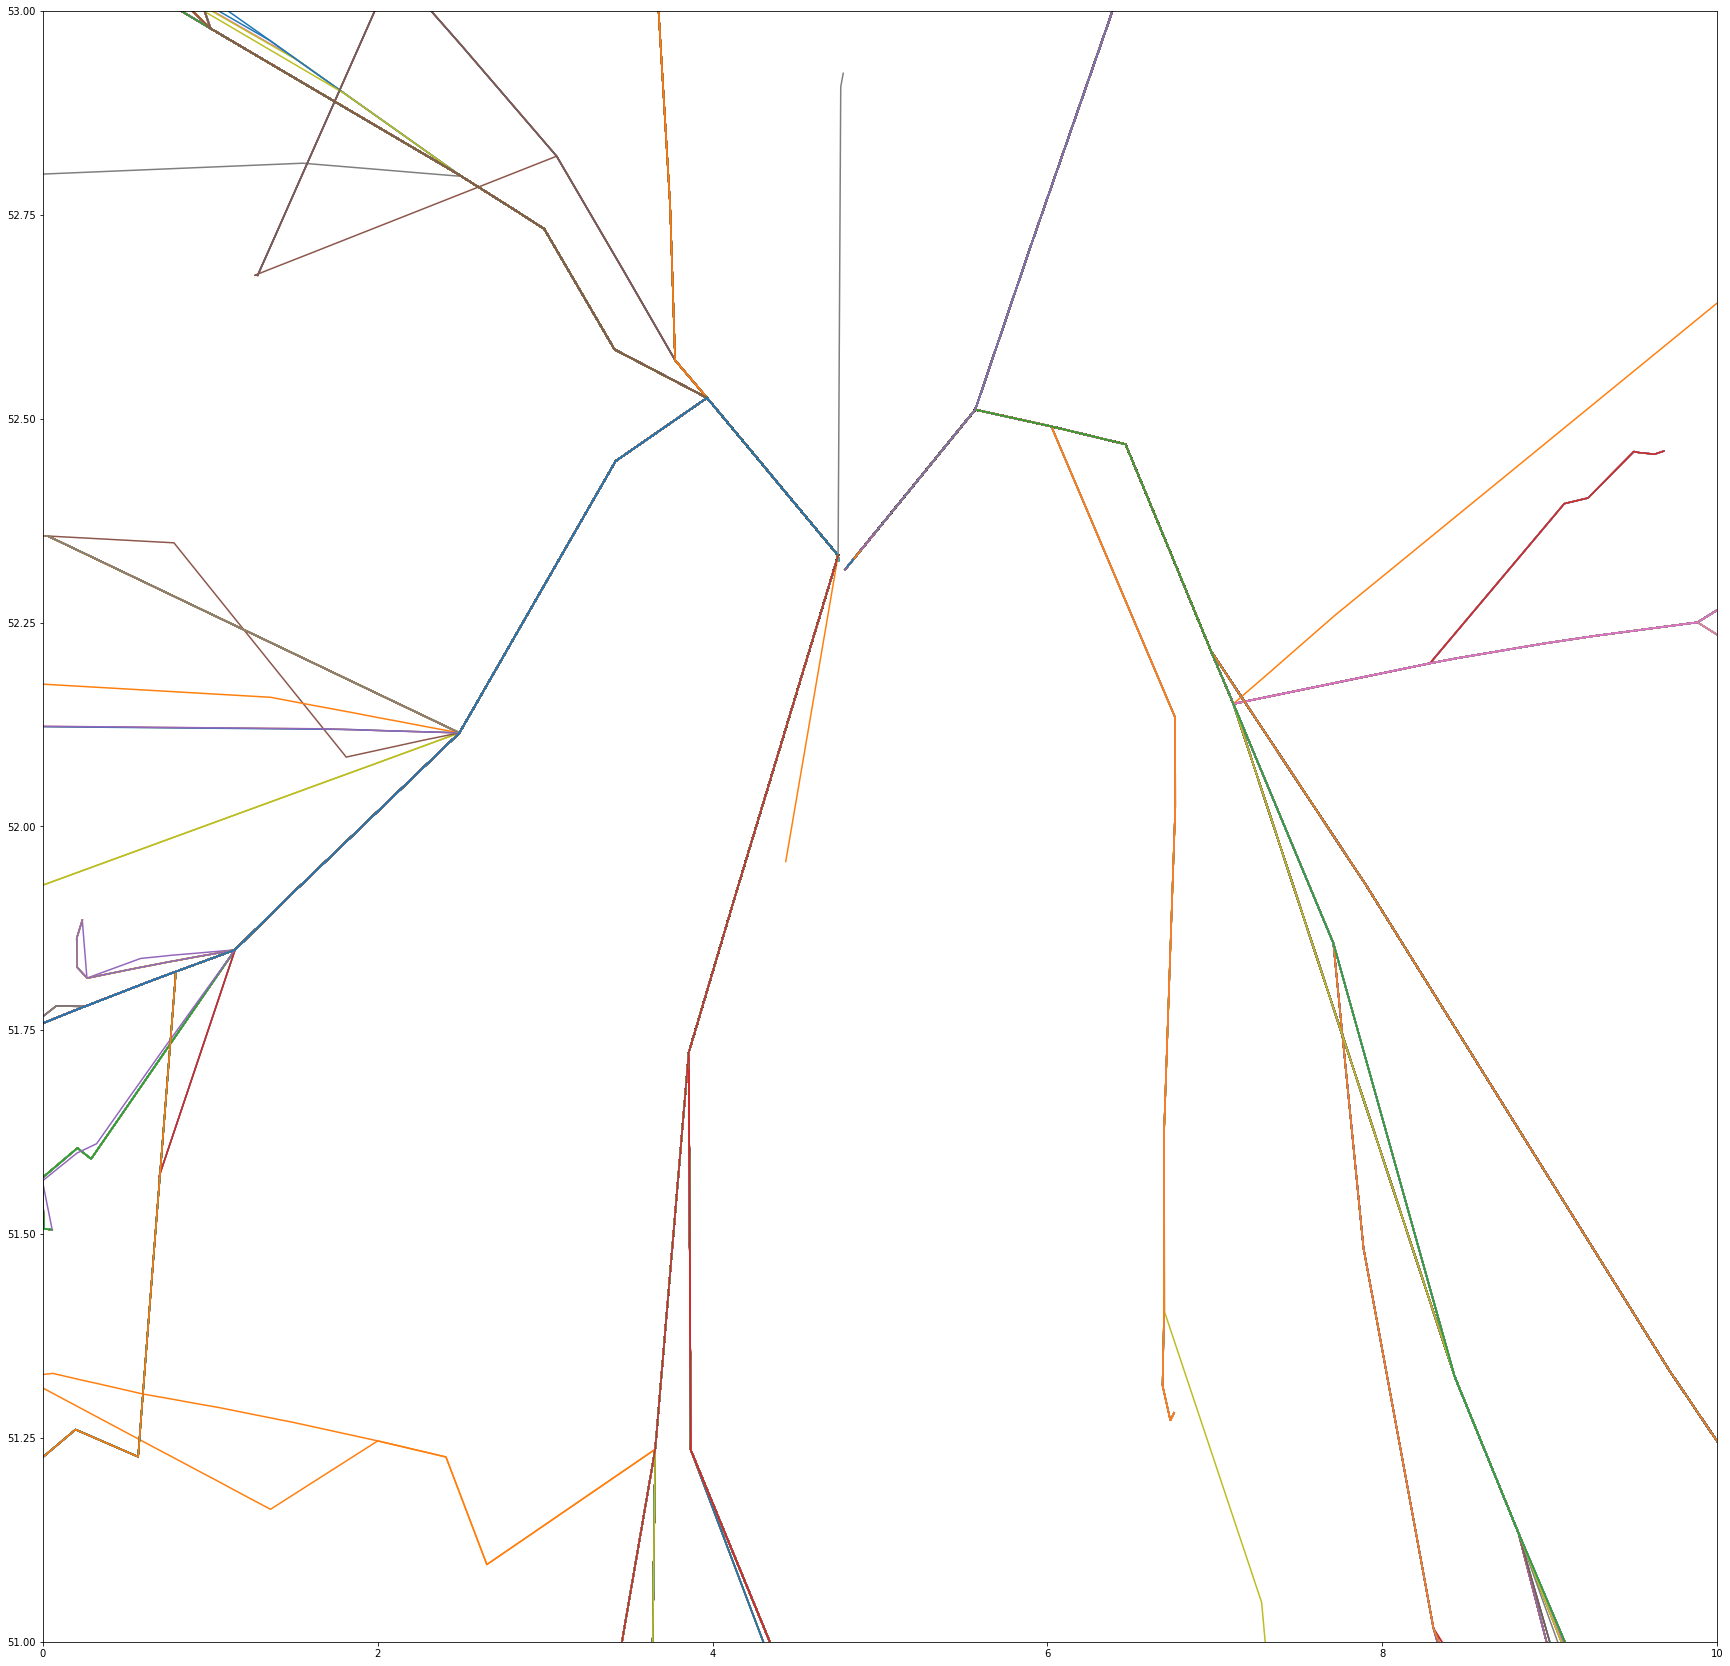

In [35]:
plt.figure(figsize=(30,30))
lat_bounds = [51, 53]
lon_bounds = [0, 10]

for d in col_ddr.find({}):
    g = pd.DataFrame(d)
    plt.plot(list(g['lon_seg_b']),list(g['lat_seg_b']))
    plt.xlim(tuple(lon_bounds))
    plt.ylim(tuple(lat_bounds))
    
plt.show()

In [39]:
col_ddr.find({'data_type':'m1'}).count()

1515